In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd
import numpy as np

In [4]:
ccdf = pd.read_csv('./Cust_Churn.csv')
ccdf.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
ccdf.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [8]:
xdf = ccdf.drop(columns = ['CustomerID', 'PaperlessBilling', 'PaymentMethod'])

In [9]:
from sklearn.preprocessing import LabelEncoder

catdata = {i for i in xdf if xdf[i].dtype == 'object'}

for cat in catdata:
    le = LabelEncoder()
    xdf[cat] = le.fit_transform(xdf[cat])

xdf

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,1,0,0,1,36.758104,63.531377,10,4,2.176498,4,1,3,0,0,0
1,57,5.175208,294.986882,0,1,0,3,32.450568,25.725595,18,0,3.478632,8,1,23,0,1,0
2,73,12.106657,883.785952,0,1,0,0,7.395160,57.364061,23,3,4.238824,6,1,1,1,1,0
3,32,7.263743,232.439774,0,2,0,3,27.960389,131.537507,30,2,4.276013,2,1,24,1,1,0
4,57,16.953078,966.325422,1,2,0,2,20.083397,45.356653,20,1,3.616170,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,0,1,0,0,13.502729,80.367312,47,4,3.697451,1,1,8,1,0,0
243783,117,13.049257,1526.763053,1,2,1,2,24.963291,59.818441,35,1,1.449742,4,1,20,0,0,0
243784,113,14.514569,1640.146267,1,2,0,2,10.628728,176.186095,44,0,4.012217,6,1,13,1,1,0
243785,7,18.140555,126.983887,1,2,0,2,30.466782,153.386315,36,3,2.135789,7,0,5,0,1,0


<Axes: >

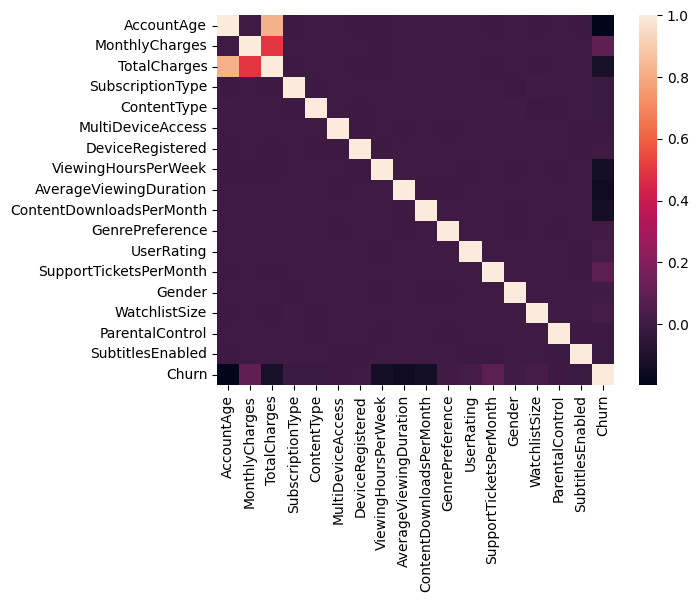

In [10]:
import seaborn as sns
sns.heatmap(xdf.corr())

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

feat = xdf.drop(columns = ['Churn'])
tgt = xdf['Churn']

feat = sc.fit_transform(feat)
feat

array([[-1.16913147, -0.33170285, -1.01254992, ..., -1.25378612,
        -1.00157228, -1.00235318],
       [-0.08994461, -1.69042309, -0.87130254, ...,  1.52668738,
        -1.00157228,  0.99765234],
       [ 0.37673079, -0.08874135,  0.25435291, ..., -1.53183347,
         0.99843019,  0.99765234],
       ...,
       [ 1.54341928,  0.46766595,  1.70034892, ...,  0.13645063,
         0.99843019,  0.99765234],
       [-1.54830522,  1.30553939, -1.19248763, ..., -0.97573877,
        -1.00157228,  0.99765234],
       [ 0.87257339, -0.20725544,  0.55957607, ..., -1.53183347,
         0.99843019, -1.00235318]])

In [39]:
from collections import Counter

cc = Counter(tgt)
cc

# No. of ones is almost 4.5 times to No.of zeros

Counter({0: 199605, 1: 44182})

In [40]:
from sklearn.model_selection import train_test_split as tts

f_train, f_test, t_train, t_test = tts(feat, tgt, test_size = 0.2)

In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
f_res, t_res = sm.fit_resample(f_train, t_train)

cc = Counter(t_res)
cc

Counter({0: 159700, 1: 159700})

In [42]:
# Observation: SMOTE balances the given data which should be imbalanced
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing = 1e-9)
gnb.fit(f_res, t_res)

GaussianNB()

In [44]:
t_predGNB = gnb.predict(f_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_matrix(t_test, t_predGNB)

array([[26639, 13266],
       [ 2880,  5973]])

In [47]:
accuracy_score(t_test, t_predGNB)

0.6688543418515935

In [48]:
print("The classification report is\n", classification_report(t_test, t_predGNB))

The classification report is
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     39905
           1       0.31      0.67      0.43      8853

    accuracy                           0.67     48758
   macro avg       0.61      0.67      0.60     48758
weighted avg       0.79      0.67      0.71     48758



In [ ]:
# I consider f1_score because that involves both accuracy and precision 

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.01, max_iter = 100, penalty = 'l2', solver = 'liblinear')
lr.fit(f_res, t_res)

LogisticRegression(C=0.01, solver='liblinear')

In [50]:
t_predLR = lr.predict(f_test)

In [51]:
confusion_matrix(t_test, t_predLR)

array([[27328, 12577],
       [ 2846,  6007]])

In [52]:
accuracy_score(t_test, t_predLR)

0.6836826777144264

In [53]:
print("The classification report\n", classification_report(t_test, t_predLR))

The classification report
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     39905
           1       0.32      0.68      0.44      8853

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.72     48758



In [ ]:
# I consider f1_score because that involves both accuracy and precision 

In [55]:
lrscore = lr.predict_proba(f_test)
gnbscore = gnb.predict_proba(f_test)

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

# pscore = lr.predict_proba(f_test)
roc_auc_score(t_test, lrscore[:, 1])

0.746884309967337

In [58]:
roc_auc_score(t_test, gnbscore[:, 1])

0.730638160129347

In [59]:
LRfpr, LRtpr, LRt = roc_curve(t_test, lrscore[:,1])
GNBfpr, GNBtpr, GNBt = roc_curve(t_test, gnbscore[:, 1])

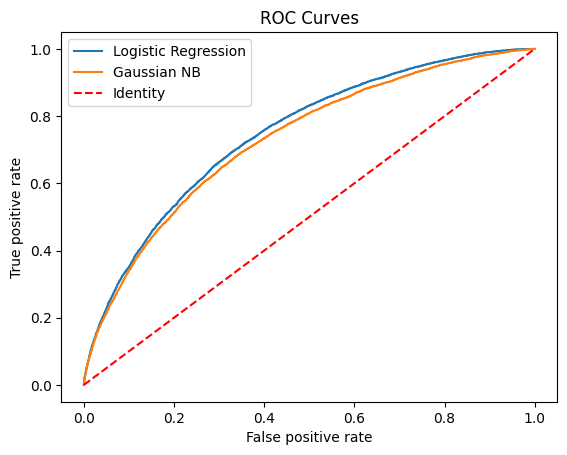

In [67]:
from matplotlib import pyplot as plt

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curves")
plt.plot(LRfpr, LRtpr, label = "Logistic Regression")
plt.plot(GNBfpr, GNBtpr, label = "Gaussian NB")
plt.plot([i * 0.1 for i in range(11)], [i * 0.1 for i in range(11)], 'r--', label = "Identity")
plt.legend()

In [ ]:
# LOGISTIC REGRESSION performs better in Imbalanced datasets